# imdb 댓글 긍정,부정판단

In [1]:
# ex) That was great. [35 , 60, 100 ]
# 단어들의 번호를 매겨서 list 안에 번호로 넣어준 값

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, SimpleRNN, LSTM

In [4]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_test, y_test)= imdb.load_data(num_words= 500)

In [5]:
x_train = x_train[:2500]
x_test = x_test[:2500]
y_train = y_train[:2500]
y_test = y_test[:2500]

In [6]:
print(x_train.shape, x_test.shape)

(2500,) (2500,)


In [7]:
x_train[:4]

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [8]:
y_train[:4] # 긍부정 binary class

array([1, 0, 0, 1], dtype=int64)

In [9]:
lengths = [len(line) for line in x_train]

(array([  8.,  34.,  79.,  67.,  75., 103., 242., 262., 212., 158., 144.,
        117.,  94.,  94.,  70.,  71.,  41.,  49.,  50.,  47.,  37.,  35.,
         24.,  21.,  29.,  21.,  28.,  18.,  22.,  16.,  13.,  16.,  20.,
         11.,  10.,  10.,   9.,  11.,  18.,  11.,   3.,   7.,   8.,   7.,
          6.,   5.,   4.,   8.,   3.,   4.,   5.,   3.,   3.,   2.,   2.,
          3.,   5.,   3.,   2.,   2.,   5.,   9.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  16.  ,   32.13,   48.26,   64.39,   80.52,   96.65,  112.78,
         128.91,  145.04,  161.17,  177.3 ,  193.43,  209.56,  225.69,
         241.82,  257.95,  274.08,  290.21,  306.34,  322.47,  338.6 ,
         354.73,  370.86,  386.99,  403.12,  419.25,  435.38,  451.51,
         467.64,  483.77,  499.9 ,

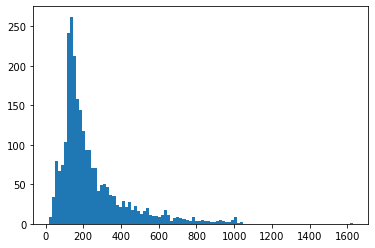

In [10]:
plt.hist(lengths, bins=100)

### 데이터길이 일정하게 바꿔주기: x_train_seq, x_test_seq

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# pad _sequences :데이터 길이를 일정하게 만들어주는 함수
# default 앞에서부터 자름

x_train_seq = pad_sequences(x_train, maxlen=200)
x_test_seq = pad_sequences(x_test, maxlen=200)


In [13]:
x_train_seq # 앞쪽을 0으로 채움

array([[  5,  25, 100, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [207, 126, 110, ...,  30,   2, 133],
       [  2, 123,   6, ...,  95, 106,  15],
       [  2,   2,  34, ...,   2, 457, 158]])

In [23]:
x_train_seq

array([[  5,  25, 100, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [207, 126, 110, ...,  30,   2, 133],
       [  2, 123,   6, ...,  95, 106,  15],
       [  2,   2,  34, ...,   2, 457, 158]])

In [14]:
print(x_train_seq.shape, x_test_seq.shape)

(2500, 200) (2500, 200)


## RNN 사용해보기

In [15]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(200,1))) # 200개 
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 80        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [17]:
# model.fit(x_train_seq,y_train, epochs= 10, batch_size=64, validation_data=(x_test_seq,y_test) )

In [18]:
x_train_seq  # 숫자크기를 나타내는 것이 아니기때문에 카테고리형식으로 바꿔줘야함

array([[  5,  25, 100, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [207, 126, 110, ...,  30,   2, 133],
       [  2, 123,   6, ...,  95, 106,  15],
       [  2,   2,  34, ...,   2, 457, 158]])

### 원핫 벡터로 만들기 : x_train_oh, x_test_oh

In [19]:
# 원핫 벡터로 만들기

from tensorflow.keras.utils import to_categorical

x_train_oh = to_categorical(x_train_seq)
x_test_oh = to_categorical(x_test_seq)

In [20]:
x_train_oh.shape

(2500, 200, 500)

In [21]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(200,500))) 
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [23]:
model.fit(x_train_oh,y_train, epochs= 10, batch_size=64, validation_data=(x_test_oh,y_test) )

Epoch 1/10
40/40 [==============================] - 9s 202ms/step - loss: 0.7005 - accuracy: 0.5068 - val_loss: 0.6998 - val_accuracy: 0.5076
Epoch 2/10
40/40 [==============================] - 8s 210ms/step - loss: 0.6857 - accuracy: 0.5464 - val_loss: 0.6982 - val_accuracy: 0.5080
Epoch 3/10
40/40 [==============================] - 9s 237ms/step - loss: 0.6747 - accuracy: 0.5856 - val_loss: 0.6944 - val_accuracy: 0.5284
Epoch 4/10
40/40 [==============================] - 9s 230ms/step - loss: 0.6639 - accuracy: 0.6124 - val_loss: 0.6955 - val_accuracy: 0.5164
Epoch 5/10
40/40 [==============================] - 9s 232ms/step - loss: 0.6506 - accuracy: 0.6480 - val_loss: 0.6946 - val_accuracy: 0.5264
Epoch 6/10
40/40 [==============================] - 9s 232ms/step - loss: 0.6337 - accuracy: 0.6724 - val_loss: 0.6939 - val_accuracy: 0.5296
Epoch 7/10
40/40 [==============================] - 9s 228ms/step - loss: 0.6128 - accuracy: 0.7020 - val_loss: 0.6978 - val_accuracy: 0.5380
Epoch 

## LSTM 사용해보기

In [24]:
model = Sequential()
model.add(LSTM(8, input_shape=(200,500))) # 200개 
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 16288     
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 16,297
Trainable params: 16,297
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [26]:
hist = model.fit(x_train_oh,y_train, epochs= 10, batch_size=64, validation_data=(x_test_oh,y_test) )

Epoch 1/10
40/40 [==============================] - 11s 51ms/step - loss: 0.6934 - accuracy: 0.5160 - val_loss: 0.6922 - val_accuracy: 0.5212
Epoch 2/10
40/40 [==============================] - 1s 27ms/step - loss: 0.6892 - accuracy: 0.5448 - val_loss: 0.6911 - val_accuracy: 0.5032
Epoch 3/10
40/40 [==============================] - 1s 27ms/step - loss: 0.6838 - accuracy: 0.5984 - val_loss: 0.6846 - val_accuracy: 0.5396
Epoch 4/10
40/40 [==============================] - 1s 26ms/step - loss: 0.6499 - accuracy: 0.6304 - val_loss: 0.6368 - val_accuracy: 0.6904
Epoch 5/10
40/40 [==============================] - 1s 27ms/step - loss: 0.5856 - accuracy: 0.7288 - val_loss: 0.5610 - val_accuracy: 0.7508
Epoch 6/10
40/40 [==============================] - 1s 27ms/step - loss: 0.5159 - accuracy: 0.7736 - val_loss: 0.5158 - val_accuracy: 0.7716
Epoch 7/10
40/40 [==============================] - 1s 27ms/step - loss: 0.4679 - accuracy: 0.7996 - val_loss: 0.4915 - val_accuracy: 0.7864
Epoch 8/10
4

### 차원 낮춰주기: Embedding

In [30]:
# 원핫 벡터를 사용하게 되면 단어하나가 500차원이 되어버림
# 원핫벡터 대신 Embedding 사용

model = Sequential()
model.add(Embedding(500,16,input_length=200))
model.add(LSTM(8)) 
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [32]:
hist = model.fit(x_train_seq,y_train, epochs= 10, batch_size=64, validation_data=(x_test_seq,y_test) )

Epoch 1/10
40/40 [==============================] - 2s 25ms/step - loss: 0.6921 - accuracy: 0.5164 - val_loss: 0.6917 - val_accuracy: 0.4852
Epoch 2/10
40/40 [==============================] - 1s 13ms/step - loss: 0.6835 - accuracy: 0.5352 - val_loss: 0.6757 - val_accuracy: 0.5708
Epoch 3/10
40/40 [==============================] - 1s 13ms/step - loss: 0.6279 - accuracy: 0.6884 - val_loss: 0.5968 - val_accuracy: 0.7244
Epoch 4/10
40/40 [==============================] - 0s 12ms/step - loss: 0.5623 - accuracy: 0.7552 - val_loss: 0.5510 - val_accuracy: 0.7644
Epoch 5/10
40/40 [==============================] - 0s 12ms/step - loss: 0.5056 - accuracy: 0.7976 - val_loss: 0.5073 - val_accuracy: 0.7820
Epoch 6/10
40/40 [==============================] - 0s 12ms/step - loss: 0.4541 - accuracy: 0.8124 - val_loss: 0.4888 - val_accuracy: 0.7852
Epoch 7/10
40/40 [==============================] - 0s 12ms/step - loss: 0.4350 - accuracy: 0.8156 - val_loss: 0.4764 - val_accuracy: 0.7848
Epoch 8/10
40